# Example notebook for Ensemble of Zonal (lev-lon) diagnostic of temperature

##### This notebook demonsterates how the ensemble module can be used for Zonal data (lev-lon) temperature data from a single ensemble or multi-model ensemble memebers

In [1]:
import sys
import xarray as xr
from aqua.diagnostics import EnsembleZonal

In [2]:
# The individual ensemble memebers datasets has to be merged in a Dataset before using the EnsembleZonal class
def merge_dataset(var=None, models_list= None, ens_dim="Ensembles"):
    dataset_list = []
    if models_list is None:
        raise NoDataError("No models provided")
    else:
        for i, data in enumerate(models_list):
            dataset_list.append(data)
    merged_dataset = xr.concat(dataset_list, ens_dim)
    del data
    del dataset_list
    #gc.collect()
    return merged_dataset

In [3]:
# path on lumi
# IFS-NEMO: /pfs/lustrep3/projappl/project_465000454/jvonhar/aqua-analysis/output/precomputed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc

In [4]:
# loading the data as xarray Datasets
# Here we are using two same files because we have only this file yet with same lev-lat
# loading the Zonal Datasets 
IFS_NEMO_1 = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc')
IFS_NEMO_2 = xr.open_dataset('/work/ab0995/a270260/pre_computed_aqua_analysis/IFS-NEMO/historical-1990/ocean3d_drift/netcdf/IFS-NEMO-historical-1990-lra-r100-monthly_zonal_mean_trend_atlantic_ocean.nc')
model_list = [IFS_NEMO_1, IFS_NEMO_2]

In [5]:
zonal_dataset = merge_dataset(var='avg_so',models_list=model_list)

In [6]:
zonal_ens = EnsembleZonal(var='avg_so', dataset=zonal_dataset)

/work/ab0995/a270260/AQUA/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/work/ab0995/a270260/AQUA/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:2035: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


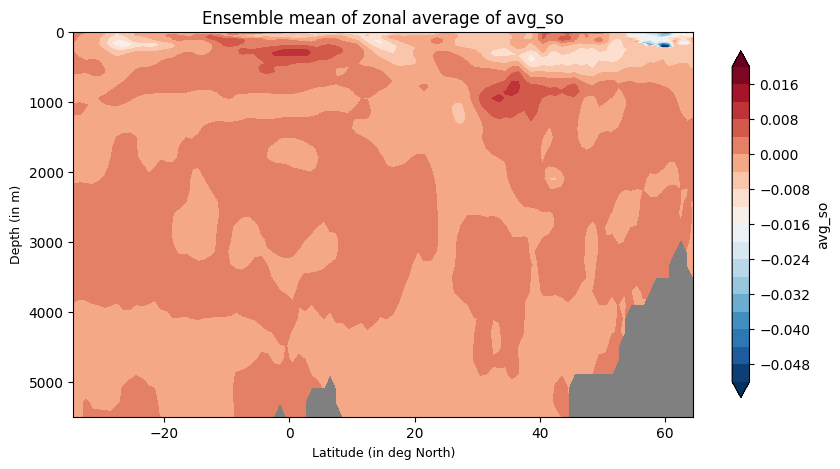

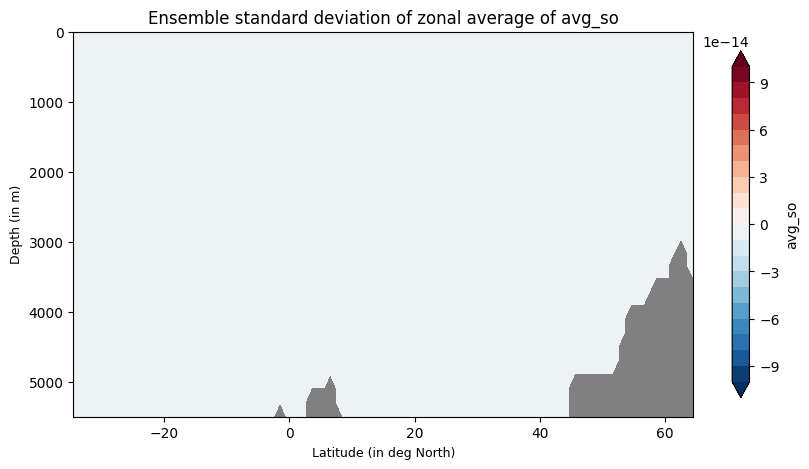

In [7]:
zonal_ens.edit_attributes(figure_size=[10,5])
zonal_ens.run()